<a href="https://colab.research.google.com/github/thao3005/cpsc672/blob/main/Null_Model_Women_in_CS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Null Models

Creation of three different null models for a co-authoship network of Women in Computer Science Research'

Code Sources:
- Null Model Exercise in Week 5 of Class https://d2l.ucalgary.ca/d2l/le/content/648011/viewContent/6905224/View


In [1]:
# Importing the required libraries

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from scipy.stats import linregress
%matplotlib inline

Parts of this was implemented using code from https://github.com/muneeb706/Graph_Analysis

In [2]:
def plot_degree_dist(G, title="Degree Distribution with Power-law Fit"):
    degrees = [G.degree(n) for n in G.nodes()]
    kmin, kmax = min(degrees), max(degrees)

    # Bin degrees using log-spaced bins if all degrees > 0
    if kmin > 0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)
    else:
        bin_edges = np.linspace(kmin, kmax, num=20)

    density, _ = np.histogram(degrees, bins=bin_edges, density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Filter for non-zero bins
    mask = (density > 0) & (bin_centers > 0)
    log_k = np.log10(bin_centers[mask])
    log_p = np.log10(density[mask])

    # Fit line in log-log space using np.polyfit
    slope, intercept = np.polyfit(log_k, log_p, 1)
    gamma = -slope
    fit_line = 10**intercept * bin_centers[mask]**slope

    # Print estimated exponent
    print(f"Estimated power-law exponent γ ≈ {gamma:.2f}")

    # Plot log-log degree distribution with fit
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.loglog(bin_centers, density, 'o', label="Data", color='orange')
    ax.loglog(bin_centers[mask], fit_line, '--', label="Power-law fit", color='green')

    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Degree $k$", fontsize=12)
    ax.set_ylabel("P(k)", fontsize=12)
    ax.legend(fontsize=10)

    # Styling
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=10)

    plt.tight_layout()
    plt.show()

In [3]:
# Read in the women in cs network
nodes_df = pd.read_csv("nodes.csv")
df = pd.read_csv("edges.csv")

nodes_df.head()


,Id,Label,WorksCount,WorksCitedBy
0,Grace Hopper,Grace Hopper,35,178
1,Barbara Liskov,Barbara Liskov,280,24552
2,Fei-Fei Li,Fei-Fei Li,759,203396
3,Shafi Goldwasser,Shafi Goldwasser,297,27506
4,Daphne Koller,Daphne Koller,375,63657


In [4]:
# Create a Graph
G = nx.Graph()

# Add nodes with their attributes
for _, row in nodes_df.iterrows():
    G.add_node(row["Id"], label=row["Label"], worksCount=row["WorksCount"], worksCitedBy=["WorksCitedBy"])

# Add edges with weights
for _, row in df.iterrows():
    G.add_edge(row["Source"], row["Target"], weight=row.get("Weight", 1))
print(G.number_of_nodes())
print(G.number_of_edges())

859
1167


Estimated power-law exponent γ ≈ 1.60


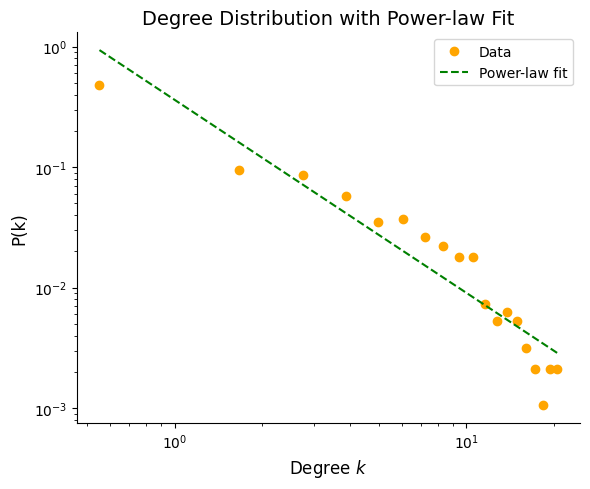

In [5]:
# Let's plot the degree distribution
plot_degree_dist(G)

In [ ]:
# Get connected components
components = list(nx.connected_components(G))

# Number of connected components
num_components = nx.number_connected_components(G)

print("Connected Components:", components)
print("Number of Components:", num_components)

Connected Components: [{'Grace Hopper'}, {'Yael Tauman Kalai', 'Marina Noris', 'Marie-Claude Gaudel', 'Janet T. Powell', 'Julie A. Kientz', 'Dana Ron', 'Zeynep Akata', 'Francesca Rossi', 'Gillian Hayes', 'Linda Petzold', 'Cynthia Breazeal', 'Emma Pierson', 'Ping Zhang', 'Martha Evens', 'Ursula Martin', 'Susan B. Davidson', 'Amber Settle', 'Melanie Mitchell', 'Orna Grumberg', 'Catuscia Palamidessi', 'Cynthia Dwork', 'Jean Bacon', 'Bette Korber', 'Diana Giannarelli', 'Sandhya Dwarkadas', 'Lydia Kavraki', 'Wendy W. Chapman', 'Sophia Drossopoulou', 'Shanika Karunasekera', 'Annie Antón', 'Carla Ellis', 'Cordelia Schmid', 'Aude Oliva', 'Susan H. Rodger', 'Michèle Sebag', 'Stephanie Weirich', 'Ingrid Verbauwhede', 'Andrea Danyluk', 'Mihaela Cardei', 'Elizabeth Mynatt', 'Himabindu Lakkaraju', 'Juliana Freire', 'Catherine Havasi', 'Lillian Lee', 'Karen L. Margolis', 'Geraldine Fitzpatrick', 'Yoonkyung Lee', 'Qing Zhao', 'Ani Nenkova', 'Martha E. Pollack', 'Jessica Hullman', 'Chia Shen', 'Elaine

In [ ]:
# ...and calculate the clustering coefficient and average path length

# Find the largest connected component
largest_cc = max(nx.connected_components(G), key=len)  # Get the largest component
G_giant = G.subgraph(largest_cc)  # Extract it as a subgraph

# Unweighted clustering coefficient
C = np.mean(list(nx.clustering(G_giant, weight=None).values()))

# Weighted clustering coefficient
C_w = np.mean(list(nx.clustering(G_giant, weight='weight').values()))

# Average shortest path length
avg_shortest_path_giant = nx.average_shortest_path_length(G_giant)

print("Average Clustering Coefficient for the giant component (unweighted):", C)
print("Average Clustering Coefficient for the giant component (weighted):", C_w)
print("Average shortest path length for the giant component:", avg_shortest_path_giant)

Average Clustering Coefficient for the giant component (unweighted): 0.1702139079263397
Average Clustering Coefficient for the giant component (weighted): 0.006485648053150406
Average shortest path length for the giant component: 4.791120831894402


In [ ]:
# calculate average degree and weighted degree
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  859
Number of edges:  1167

Average degree:  2.7171129220023285
Average degree (alternate calculation) 2.7171129220023285

Minimum degree:  0
Maximum degree:  21


In [ ]:
# calculate the average weighted degree
total_weight = 0
for node in G.nodes():
  node_weight = 0
  for neighbor in G.neighbors(node):
      node_weight += (G[node][neighbor]['weight'])
  total_weight += node_weight
average_weighted_degree = total_weight / G.number_of_nodes()
print("Average weighted degree:", average_weighted_degree)

Average weighted degree: 8.348079161816065


## Comparing to an Erdös-Renyi graph of similar size

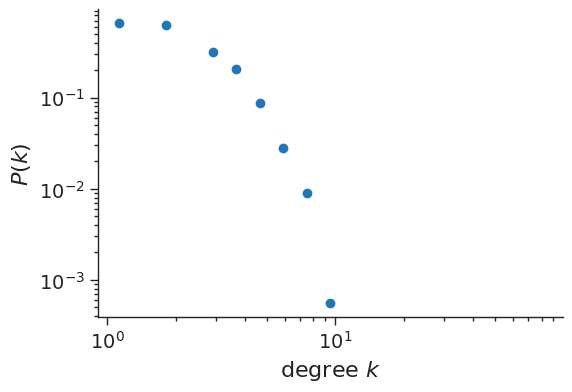

In [ ]:
GN = len(G.nodes()) # G.number_of_nodes()
max_L = GN*(GN-1)/2
actual_L = len(G.edges())
p = actual_L/max_L

ER = nx.erdos_renyi_graph(GN, p, directed=False)

plot_degree_dist(ER)

In [ ]:
# This is just one instance of a random graph. We need to create an ensemble.

clustering_ER = []
short_path_ER = []

for i in range(1000):

    ER = nx.erdos_renyi_graph(GN, p, directed=False)
    if nx.is_connected(ER)==True:
        d_ER = nx.average_shortest_path_length(ER,weight=None)
    else:
      # Find the largest connected component
      largest_ER_cc = max(nx.connected_components(G), key=len)  # Get the largest component
      ER_giant = G.subgraph(largest_ER_cc)  # Extract it as a subgraph
      # Compute the average shortest path length
      C_ER = np.mean(list(nx.clustering(ER_giant).values()))
      d_ER = nx.average_shortest_path_length(ER_giant)
    clustering_ER.append(C_ER)
    short_path_ER.append(d_ER)

print(np.mean(clustering_ER))
print(np.std(clustering_ER))

print(np.mean(short_path_ER))
print(np.std(short_path_ER))

0.1702139079263397
0.0
4.7911208318944025
8.881784197001252e-16


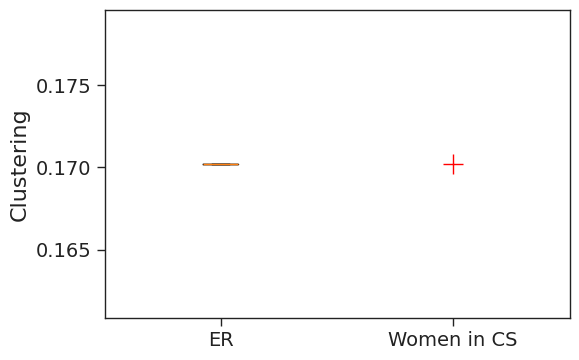

In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(clustering_ER)
plt.plot(2,C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','Women in CS'])
plt.ylabel('Clustering')
plt.xlim([0.5,2.5])
plt.show()

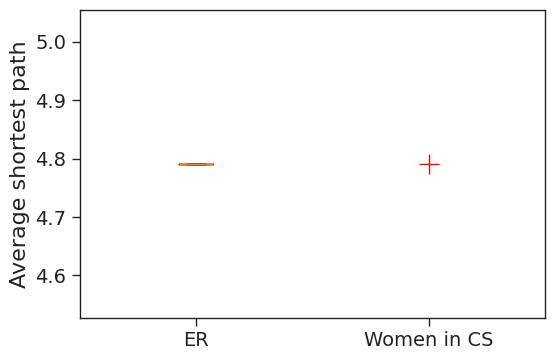

In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(short_path_ER)
plt.plot(2,avg_shortest_path_giant,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','Women in CS'])
plt.ylabel('Average shortest path')
plt.xlim([0.5,2.5])
plt.show()

## Comparison to Degree Preserving Null Model

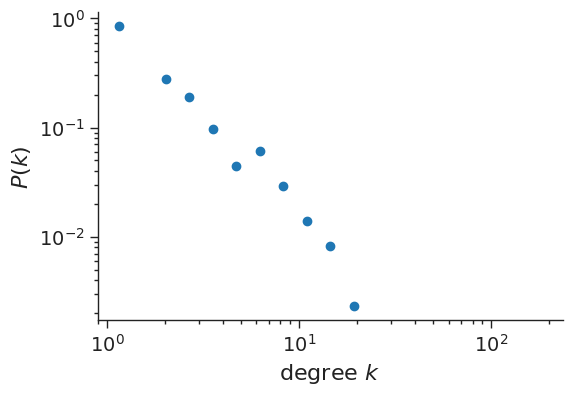

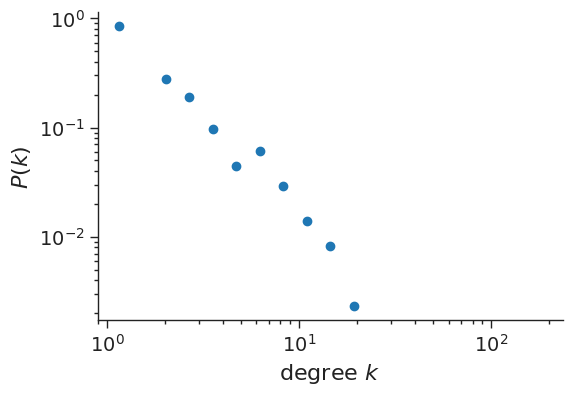

In [ ]:
# Calculating metrics for a Degree Preservation Graph

DP = G.copy() # the function edits the graph in place

nx.double_edge_swap(DP,nswap=10*G.number_of_edges(),max_tries=100000)
plot_degree_dist(DP)
plot_degree_dist(G)

In [ ]:
# Let's create the ensemble.

clustering_DP = []
short_path_DP = []

for i in range(1000):

    nx.double_edge_swap(DP,nswap=10*G.number_of_edges(),max_tries=100000)
    if nx.is_connected(DP)==True:
        d_DP = nx.average_shortest_path_length(DP,weight=None)
        C_DP = np.mean(list(nx.clustering(DP).values()))
    else:
      # Find the largest connected component
      largest_DP_cc = max(nx.connected_components(DP), key=len)  # Get the largest component
      DP_giant = DP.subgraph(largest_DP_cc)  # Extract it as a subgraph
      # Compute the average shortest path length
      C_DP = np.mean(list(nx.clustering(DP_giant).values()))
      d_DP = nx.average_shortest_path_length(DP_giant)
    clustering_DP.append(C_DP)
    short_path_DP.append(d_DP)

print(np.mean(clustering_DP))
print(np.std(clustering_DP))

print(np.mean(short_path_DP))
print(np.std(short_path_DP))

0.013433667494324201
0.0031867988646583395
4.206531964996801
0.03314464923552292


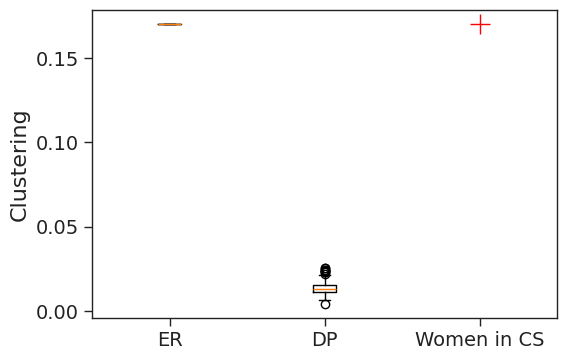

In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot([clustering_ER,clustering_DP], positions=[1,2])
plt.plot(3,C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','Women in CS'])
plt.ylabel('Clustering')
plt.xlim([0.5,3.5])
plt.show()

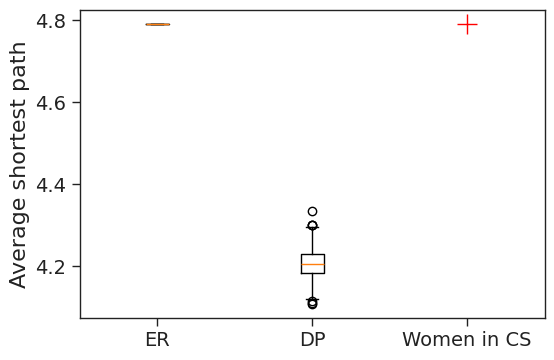

In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot([short_path_ER,short_path_DP], positions=[1,2])
plt.plot(3,avg_shortest_path_giant,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','Women in CS'])
plt.ylabel('Average shortest path')
plt.xlim([0.5,3.5])
plt.show()

## Weight & Degree Preserving

In [ ]:
DP_weighted = G.copy()

clustering_DW = []
short_path_DW = []

for i in range(1000):

    # Perform degree-preserving rewiring
    nx.double_edge_swap(DP_weighted, nswap=10 * G.number_of_edges(), max_tries=100000)

    # Shuffle edge weights randomly among existing edges
    weights = [G[u][v]["weight"] for u, v in G.edges()]
    random.shuffle(weights)
    for (u, v), w in zip(DP_weighted.edges(), weights):
        DP_weighted[u][v]["weight"] = w


    if nx.is_connected(DP_weighted):
        d_DW = nx.average_shortest_path_length(DP_weighted, weight="weight")
        C_DW = np.mean(list(nx.clustering(DP_weighted, weight="weight").values()))
    else:
        # Find the largest connected component
        largest_DW_cc = max(nx.connected_components(DP_weighted), key=len)
        DW_giant = DP_weighted.subgraph(largest_DW_cc)
        C_DW = np.mean(list(nx.clustering(DW_giant, weight="weight").values()))
        d_DW = nx.average_shortest_path_length(DW_giant, weight="weight")

    clustering_DW.append(C_DW)
    short_path_DW.append(d_DW)


print("Clustering Coefficient (Degree & Weight Preserving Null Model):")
print(f"Mean: {np.mean(clustering_DW)}, Std: {np.std(clustering_DW)}")

print("Average Shortest Path Length (Degree & Weight Preserving Null Model):")
print(f"Mean: {np.mean(short_path_DW)}, Std: {np.std(short_path_DW)}")

Clustering Coefficient (Degree & Weight Preserving Null Model):
Mean: 0.0003810502388790913, Std: 0.00010700841689447638
Average Shortest Path Length (Degree & Weight Preserving Null Model):
Mean: 7.062324765675946, Std: 0.2789333580349854


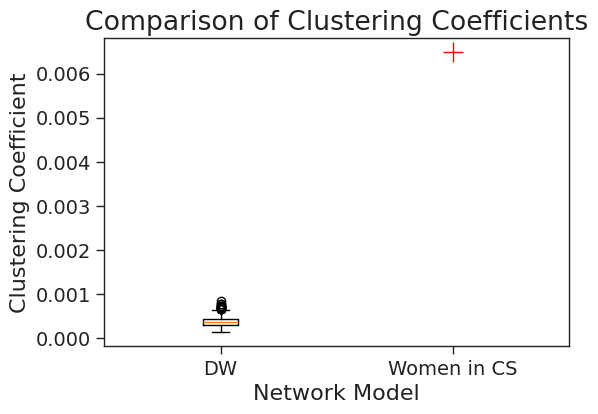

In [ ]:
# Create figure comparing clustering coefficient

fig = plt.figure(figsize=(6, 4))

plt.boxplot(clustering_DW)
plt.plot(2,C_w,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1, 2])
ax.set_xticklabels(['DW', 'Women in CS'])
plt.ylabel('Clustering Coefficient')
plt.xlabel('Network Model')
plt.xlim([0.5, 4.5])
plt.title('Comparison of Clustering Coefficients')
plt.xlim([0.5, 2.5])
plt.show()



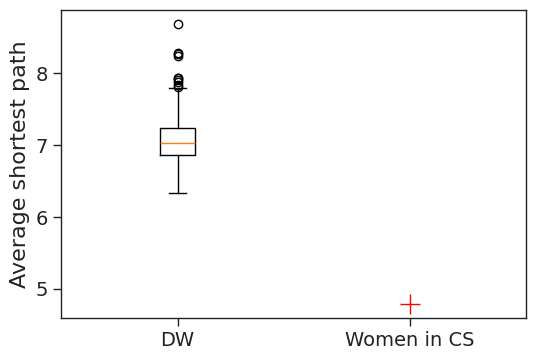

In [ ]:
# Create figure comparing shortest path

fig = plt.figure(figsize=(6, 4))

plt.boxplot(short_path_DW)
plt.plot(2,avg_shortest_path_giant,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1, 2])
ax.set_xticklabels(['DW', 'Women in CS'])
plt.ylabel('Average shortest path')
plt.xlim([0.5, 2.5])
plt.show()